# Gender Fairness Analysis Framework

This notebook demonstrates how to analyze gender fairness in your distillation experiments using the fairness framework.

## Overview
- Analyze gender performance differences in your models
- Evaluate if distillation affects fairness
- Generate visualizations and reports
- Provide recommendations for improvement

## Setup and Imports

In [3]:
# Import required libraries
import sys
sys.path.append('../')  # Add parent directory to path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import json

# Import our gender fairness analyzer
from gender_fairness_analyzer import GenderFairnessAnalyzer

# Set up visualization style
plt.style.use('default')
sns.set_palette("husl")

print("👫 Gender Fairness Analysis System Loaded!")
print("🎯 Ready to analyze gender fairness in your diabetes prediction models")

# Initialize analyzer
analyzer = GenderFairnessAnalyzer()

# Get patient data from the patient analyzer
patient_data = analyzer.patient_analyzer.patient_data
print(f"📊 Patient data loaded: {len(patient_data)} patients")

# Quick demographic overview
gender_counts = patient_data['Gender'].value_counts().to_dict()
print(f"📈 Demographics: {gender_counts}")

👫 Gender Fairness Analysis System Loaded!
🎯 Ready to analyze gender fairness in your diabetes prediction models
✅ Loaded 12 patient records
Available columns: ['ID', 'Gender', 'Age', 'Pump Model', 'Sensor Band', 'Cohort']
Patient data preview:
    ID  Gender    Age Pump Model Sensor Band  Cohort
0  540    male  20–40       630G    Empatica    2020
1  544    male  40–60       530G    Empatica    2020
2  552    male  20–40       630G    Empatica    2020
3  567  female  20–40       630G    Empatica    2020
4  584    male  40–60       530G    Empatica    2020
📊 Patient data loaded: 12 patients
📈 Demographics: {'male': 7, 'female': 5}


## 1. Patient Demographics Analysis

In [4]:
# Use the patient analyzer from the gender analyzer
patient_analyzer = analyzer.patient_analyzer

# Get demographic summary
print("📊 PATIENT DEMOGRAPHICS")
print("=" * 50)

summary = patient_analyzer.get_demographic_summary()
print(f"Total patients: {summary['total_patients']}")
print(f"Gender distribution: {summary['gender_distribution']}")
print(f"Age distribution: {summary['age_distribution']}")

# Show patient data
patient_data = patient_analyzer.patient_data
print("\n📋 Patient Data Preview:")
display(patient_data.head())

📊 PATIENT DEMOGRAPHICS
Total patients: 12
Gender distribution: {'male': 7, 'female': 5}
Age distribution: {'40–60': 8, '20–40': 3, '60–80': 1}

📋 Patient Data Preview:


,ID,Gender,Age,Pump Model,Sensor Band,Cohort
0,540,male,20–40,630G,Empatica,2020
1,544,male,40–60,530G,Empatica,2020
2,552,male,20–40,630G,Empatica,2020
3,567,female,20–40,630G,Empatica,2020
4,584,male,40–60,530G,Empatica,2020


👥 GENDER GROUPS FOR FAIRNESS ANALYSIS
👨 Male patients (7): [540, 544, 552, 584, 596, 563, 570]
👩 Female patients (5): [567, 559, 575, 588, 591]


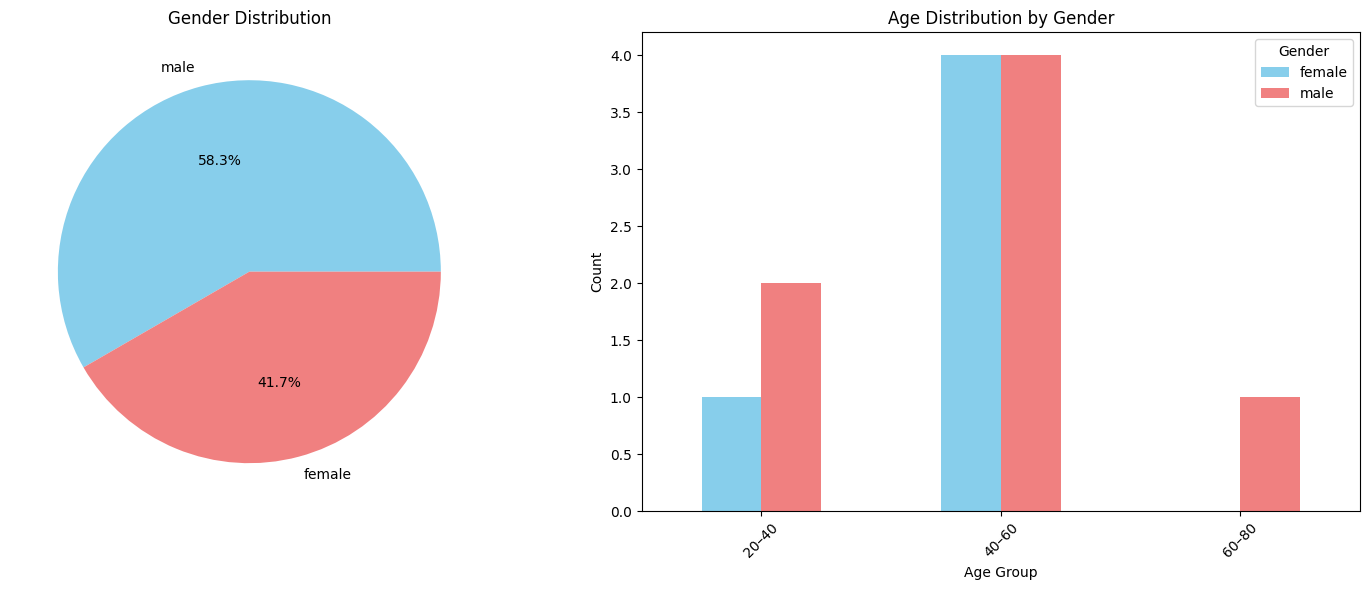

In [5]:
# Create gender groups for analysis
gender_groups = patient_analyzer.create_fairness_groups('Gender')

print("👥 GENDER GROUPS FOR FAIRNESS ANALYSIS")
print("=" * 50)
print(f"👨 Male patients ({len(gender_groups['male'])}): {gender_groups['male']}")
print(f"👩 Female patients ({len(gender_groups['female'])}): {gender_groups['female']}")

# Visualize gender distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gender pie chart
gender_counts = patient_data['Gender'].value_counts()
ax1.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightcoral'])
ax1.set_title('Gender Distribution')

# Age by gender
age_gender = patient_data.groupby(['Age', 'Gender']).size().unstack(fill_value=0)
age_gender.plot(kind='bar', ax=ax2, color=['skyblue', 'lightcoral'])
ax2.set_title('Age Distribution by Gender')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Count')
ax2.legend(title='Gender')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 2. Load Distillation Experiment Results

In [6]:
# Initialize the main analyzer
analyzer = GenderFairnessAnalyzer()

# Find available experiments
experiment_dirs = analyzer.find_experiment_directories()

# Use the latest experiment
if experiment_dirs:
    latest_experiment = experiment_dirs[0]
    print(f"✅ Using experiment: {latest_experiment.name}")
    
    # Load patient results
    patient_results = analyzer.load_patient_results(latest_experiment)
    print(f"📊 Loaded results for {len(patient_results)} patients")
    
    # Show sample results
    sample_patient = list(patient_results.keys())[0]
    sample_data = patient_results[sample_patient]
    
    print(f"\n📋 Sample Results (Patient {sample_patient}):")
    for model_type, metrics in sample_data.items():
        if isinstance(metrics, dict) and 'rmse' in metrics:
            print(f"  {model_type.upper()}:")
            print(f"    RMSE: {metrics['rmse']:.3f}")
            print(f"    MAE:  {metrics['mae']:.3f}")
            print(f"    MAPE: {metrics['mape']:.3f}")
else:
    print("❌ No experiment directories found!")

✅ Loaded 12 patient records
Available columns: ['ID', 'Gender', 'Age', 'Pump Model', 'Sensor Band', 'Cohort']
Patient data preview:
    ID  Gender    Age Pump Model Sensor Band  Cohort
0  540    male  20–40       630G    Empatica    2020
1  544    male  40–60       530G    Empatica    2020
2  552    male  20–40       630G    Empatica    2020
3  567  female  20–40       630G    Empatica    2020
4  584    male  40–60       530G    Empatica    2020
📁 Found 5 experiment directories:
  0: pipeline_2025-10-18_12-56-50
  1: pipeline_2025-10-18_09-17-35
  2: pipeline_2025-10-17_20-18-02
  3: pipeline_2025-10-17_13-28-33
  4: pipeline_2025-10-17_09-50-41
✅ Using experiment: pipeline_2025-10-18_12-56-50
📊 Loading results from 12 patients...
📊 Loaded results for 12 patients

📋 Sample Results (Patient 540):
  TEACHER:
    RMSE: 23.502
    MAE:  15.121
    MAPE: 10.605
  STUDENT_BASELINE:
    RMSE: 22.850
    MAE:  14.640
    MAPE: 10.267
  DISTILLED:
    RMSE: 23.578
    MAE:  15.088
    MAPE: 10.

## 3. Gender Fairness Analysis

In [7]:
# Run gender fairness analysis
if patient_results:
    print("🔍 RUNNING GENDER FAIRNESS ANALYSIS")
    print("=" * 50)
    
    # Analyze gender performance
    gender_performance = analyzer.analyze_gender_fairness(patient_results)
    
    # Calculate fairness metrics
    fairness_analysis = analyzer.calculate_fairness_metrics(gender_performance)
    
    # Analyze distillation impact
    distillation_impact = analyzer.analyze_distillation_impact(fairness_analysis)
    
    print("\n✅ Analysis complete!")
else:
    print("❌ Cannot run analysis - no patient results loaded")

🔍 RUNNING GENDER FAIRNESS ANALYSIS
🔍 ANALYZING GENDER FAIRNESS
👨 Male patients: [540, 544, 552, 584, 596, 563, 570]
👩 Female patients: [567, 559, 575, 588, 591]

📊 MALE GROUP ANALYSIS:
   Available patients: [540, 544, 552, 584, 596, 563, 570]
   TEACHER:
     RMSE: 19.963
     MAE: 12.535
     MAPE: 8.259
     Samples: 7
   STUDENT_BASELINE:
     RMSE: 19.781
     MAE: 12.404
     MAPE: 8.171
     Samples: 7
   DISTILLED:
     RMSE: 20.001
     MAE: 12.567
     MAPE: 8.282
     Samples: 7

📊 FEMALE GROUP ANALYSIS:
   Available patients: [567, 559, 575, 588, 591]
   TEACHER:
     RMSE: 22.080
     MAE: 13.588
     MAPE: 9.267
     Samples: 5
   STUDENT_BASELINE:
     RMSE: 22.439
     MAE: 13.829
     MAPE: 9.421
     Samples: 5
   DISTILLED:
     RMSE: 22.083
     MAE: 13.517
     MAPE: 9.227
     Samples: 5
⚖️ FAIRNESS ANALYSIS

TEACHER MODEL:
  Male RMSE:   19.963
  Female RMSE: 22.080
  Difference:  2.117
  Ratio:       1.11x
  Fairness:    0.0503 (GOOD)
  Worse for:   female

STUD

## 4. Performance Comparison Visualization

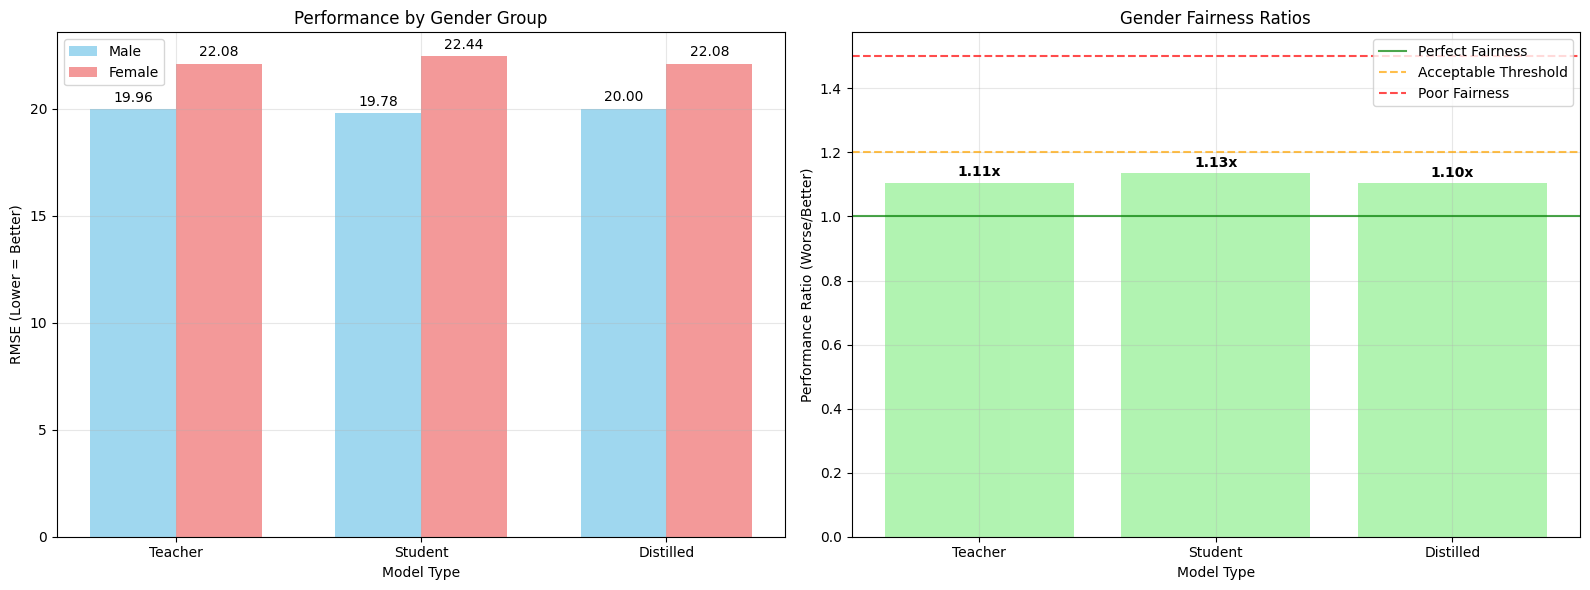

In [8]:
if fairness_analysis:
    # Create performance comparison plot
    models = ['Teacher', 'Student', 'Distilled']
    model_keys = ['teacher', 'student_baseline', 'distilled']
    
    male_rmse = []
    female_rmse = []
    
    for key in model_keys:
        if key in fairness_analysis:
            male_rmse.append(fairness_analysis[key]['male_rmse'])
            female_rmse.append(fairness_analysis[key]['female_rmse'])
    
    # Create comparison plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # RMSE comparison
    x = np.arange(len(models[:len(male_rmse)]))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, male_rmse, width, label='Male', color='skyblue', alpha=0.8)
    bars2 = ax1.bar(x + width/2, female_rmse, width, label='Female', color='lightcoral', alpha=0.8)
    
    ax1.set_xlabel('Model Type')
    ax1.set_ylabel('RMSE (Lower = Better)')
    ax1.set_title('Performance by Gender Group')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models[:len(male_rmse)])
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=10)
    
    # Fairness ratios
    ratios = [fairness_analysis[key]['rmse_ratio'] for key in model_keys if key in fairness_analysis]
    colors = ['lightgreen' if r < 1.2 else 'gold' if r < 1.5 else 'salmon' for r in ratios]
    
    bars3 = ax2.bar(models[:len(ratios)], ratios, color=colors, alpha=0.7)
    ax2.set_xlabel('Model Type')
    ax2.set_ylabel('Performance Ratio (Worse/Better)')
    ax2.set_title('Gender Fairness Ratios')
    ax2.axhline(y=1.0, color='green', linestyle='-', alpha=0.7, label='Perfect Fairness')
    ax2.axhline(y=1.2, color='orange', linestyle='--', alpha=0.7, label='Acceptable Threshold')
    ax2.axhline(y=1.5, color='red', linestyle='--', alpha=0.7, label='Poor Fairness')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    for bar, ratio in zip(bars3, ratios):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{ratio:.2f}x', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## 5. Fairness Metrics Dashboard

📊 FAIRNESS METRICS SUMMARY


,Model,Male RMSE,Female RMSE,Difference,Ratio,Fairness Score,Assessment,Worse For
0,Teacher,19.963,22.080,2.117,1.11x,0.0503,GOOD,female
1,Student Baseline,19.781,22.439,2.658,1.13x,0.0630,GOOD,female
2,Distilled,20.001,22.083,2.081,1.10x,0.0495,EXCELLENT,female


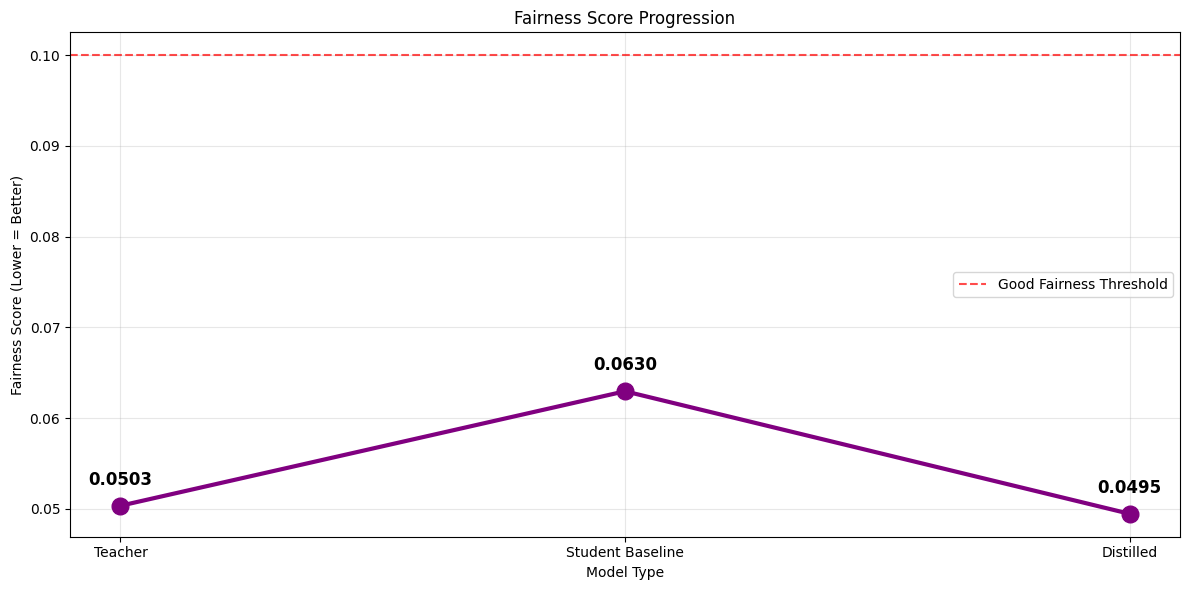

In [9]:
if fairness_analysis:
    # Create fairness metrics table
    metrics_data = []
    
    for model_type, results in fairness_analysis.items():
        metrics_data.append({
            'Model': model_type.replace('_', ' ').title(),
            'Male RMSE': f"{results['male_rmse']:.3f}",
            'Female RMSE': f"{results['female_rmse']:.3f}",
            'Difference': f"{results['rmse_difference']:.3f}",
            'Ratio': f"{results['rmse_ratio']:.2f}x",
            'Fairness Score': f"{results['fairness_score']:.4f}",
            'Assessment': results['fairness_assessment'],
            'Worse For': results['worse_gender']
        })
    
    metrics_df = pd.DataFrame(metrics_data)
    
    print("📊 FAIRNESS METRICS SUMMARY")
    print("=" * 80)
    display(metrics_df)
    
    # Fairness progression plot
    if len(fairness_analysis) >= 2:
        fairness_scores = [fairness_analysis[model]['fairness_score'] 
                          for model in ['teacher', 'student_baseline', 'distilled'] 
                          if model in fairness_analysis]
        model_names = [model.replace('_', ' ').title() for model in ['teacher', 'student_baseline', 'distilled'] 
                      if model in fairness_analysis]
        
        plt.figure(figsize=(12, 6))
        plt.plot(model_names, fairness_scores, 'o-', linewidth=3, markersize=12, color='purple')
        plt.xlabel('Model Type')
        plt.ylabel('Fairness Score (Lower = Better)')
        plt.title('Fairness Score Progression')
        plt.axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='Good Fairness Threshold')
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        # Annotate points
        for i, (model, score) in enumerate(zip(model_names, fairness_scores)):
            plt.annotate(f'{score:.4f}', (i, score), textcoords="offset points", 
                        xytext=(0,15), ha='center', fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.show()

## 6. Distillation Impact Analysis

🎯 DISTILLATION IMPACT ON GENDER FAIRNESS


,Metric,Value
0,Teacher Fairness Score,0.0503
1,Distilled Fairness Score,0.0495
2,Change,-0.0009
3,Percent Change,-1.8%



🎯 CONCLUSION: ✅ DISTILLATION MAINTAINS OR IMPROVES GENDER FAIRNESS
📊 SEVERITY: GOOD


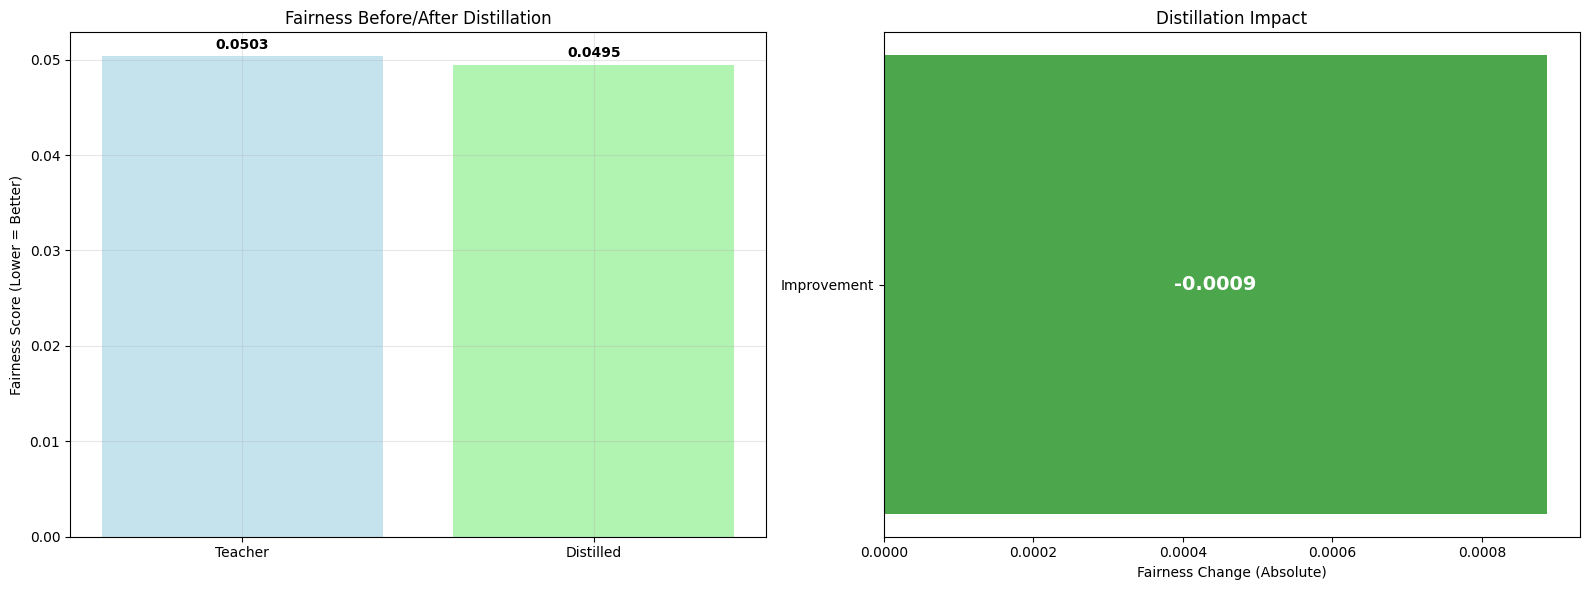

In [10]:
if distillation_impact:
    print("🎯 DISTILLATION IMPACT ON GENDER FAIRNESS")
    print("=" * 60)
    
    # Create impact summary
    impact_data = {
        'Metric': ['Teacher Fairness Score', 'Distilled Fairness Score', 'Change', 'Percent Change'],
        'Value': [
            f"{distillation_impact['teacher_fairness']:.4f}",
            f"{distillation_impact['distilled_fairness']:.4f}", 
            f"{distillation_impact['fairness_change']:+.4f}",
            f"{distillation_impact['percent_change']:+.1f}%"
        ]
    }
    
    impact_df = pd.DataFrame(impact_data)
    display(impact_df)
    
    print(f"\n🎯 CONCLUSION: {distillation_impact['conclusion']}")
    print(f"📊 SEVERITY: {distillation_impact['severity']}")
    
    # Visualize impact
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Before/After comparison
    models = ['Teacher', 'Distilled']
    fairness_scores = [distillation_impact['teacher_fairness'], distillation_impact['distilled_fairness']]
    colors = ['lightblue', 'lightgreen' if distillation_impact['fairness_change'] < 0 else 'lightcoral']
    
    bars = ax1.bar(models, fairness_scores, color=colors, alpha=0.7)
    ax1.set_ylabel('Fairness Score (Lower = Better)')
    ax1.set_title('Fairness Before/After Distillation')
    ax1.grid(True, alpha=0.3)
    
    for bar, score in zip(bars, fairness_scores):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{score:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # Impact visualization
    change = distillation_impact['fairness_change']
    color = 'green' if change < 0 else 'red'
    direction = 'Improvement' if change < 0 else 'Degradation'
    
    ax2.barh([direction], [abs(change)], color=color, alpha=0.7)
    ax2.set_xlabel('Fairness Change (Absolute)')
    ax2.set_title('Distillation Impact')
    ax2.text(abs(change)/2, 0, f'{change:+.4f}', ha='center', va='center', 
             fontweight='bold', fontsize=14, color='white')
    
    plt.tight_layout()
    plt.show()

## 7. Individual Patient Analysis

👤 INDIVIDUAL PATIENT PERFORMANCE


,Patient ID,Gender,Teacher RMSE,Distilled RMSE,Improvement
0,540,male,23.502434,23.578218,-0.075785
1,544,male,18.383926,18.292603,0.091323
2,552,male,17.536759,17.899601,-0.362842
3,559,female,21.107465,21.014532,0.092932
4,563,male,19.210218,19.185295,0.024923
5,567,female,26.004895,26.250195,-0.245299
6,570,male,16.546350,16.550943,-0.004593
7,575,female,22.895961,22.854828,0.041133
8,584,male,26.331396,26.409048,-0.077652
9,588,female,18.698213,18.691092,0.007122


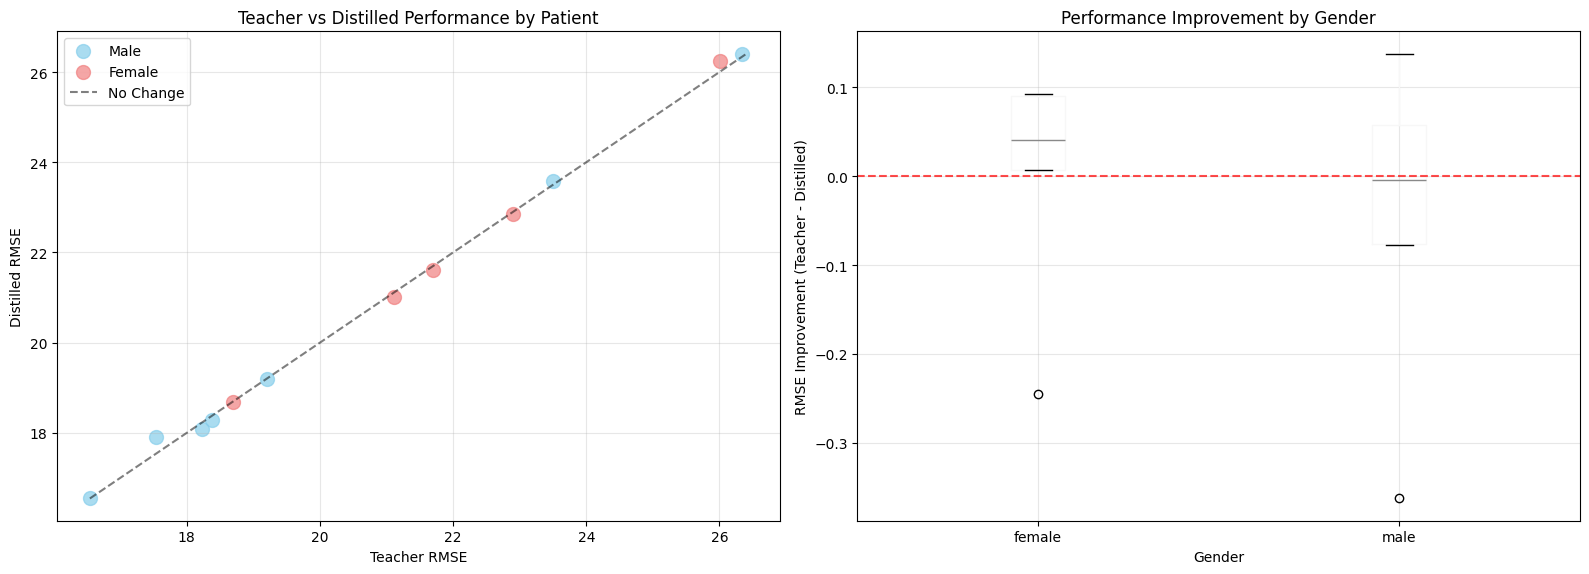


📈 IMPROVEMENT STATISTICS BY GENDER:


,mean,std,count
Gender,,,
female,-0.002811,0.140198,5
male,-0.038085,0.163966,7


In [11]:
if patient_results and gender_groups:
    # Analyze individual patient performance
    patient_performance = []
    
    for patient_id, results in patient_results.items():
        if 'distilled' in results and 'teacher' in results:
            gender = 'male' if patient_id in gender_groups['male'] else 'female'
            
            patient_performance.append({
                'Patient ID': patient_id,
                'Gender': gender,
                'Teacher RMSE': results['teacher']['rmse'],
                'Distilled RMSE': results['distilled']['rmse'],
                'Improvement': results['teacher']['rmse'] - results['distilled']['rmse']
            })
    
    patient_df = pd.DataFrame(patient_performance)
    
    print("👤 INDIVIDUAL PATIENT PERFORMANCE")
    print("=" * 50)
    display(patient_df)
    
    # Plot individual performance
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Scatter plot: Teacher vs Distilled
    male_data = patient_df[patient_df['Gender'] == 'male']
    female_data = patient_df[patient_df['Gender'] == 'female']
    
    ax1.scatter(male_data['Teacher RMSE'], male_data['Distilled RMSE'], 
               c='skyblue', label='Male', alpha=0.7, s=100)
    ax1.scatter(female_data['Teacher RMSE'], female_data['Distilled RMSE'], 
               c='lightcoral', label='Female', alpha=0.7, s=100)
    
    # Add diagonal line (no change)
    min_val = min(patient_df['Teacher RMSE'].min(), patient_df['Distilled RMSE'].min())
    max_val = max(patient_df['Teacher RMSE'].max(), patient_df['Distilled RMSE'].max())
    ax1.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='No Change')
    
    ax1.set_xlabel('Teacher RMSE')
    ax1.set_ylabel('Distilled RMSE')
    ax1.set_title('Teacher vs Distilled Performance by Patient')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Improvement by gender
    patient_df.boxplot(column='Improvement', by='Gender', ax=ax2)
    ax2.set_xlabel('Gender')
    ax2.set_ylabel('RMSE Improvement (Teacher - Distilled)')
    ax2.set_title('Performance Improvement by Gender')
    ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='No Improvement')
    ax2.grid(True, alpha=0.3)
    
    plt.suptitle('')  # Remove default title
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("\n📈 IMPROVEMENT STATISTICS BY GENDER:")
    improvement_stats = patient_df.groupby('Gender')['Improvement'].agg(['mean', 'std', 'count'])
    display(improvement_stats)

## 8. Recommendations and Next Steps

In [12]:
if distillation_impact:
    print("🎯 RECOMMENDATIONS BASED ON YOUR RESULTS")
    print("=" * 60)
    
    if distillation_impact['makes_fairness_worse']:
        severity = distillation_impact['severity']
        if severity == 'CRITICAL':
            print("🚨 IMMEDIATE ACTION REQUIRED:")
            print("   • Implement fairness-aware distillation immediately")
            print("   • Use demographic parity loss with fairness_weight=0.5")
            print("   • Consider adversarial fairness training")
            print("   • Balance training data across gender groups")
        elif severity == 'MODERATE':
            print("⚠️ MODERATE INTERVENTION NEEDED:")
            print("   • Implement fairness-aware training")
            print("   • Use demographic parity loss with fairness_weight=0.2")
            print("   • Monitor fairness metrics during training")
        else:
            print("➖ MINOR INTERVENTION SUGGESTED:")
            print("   • Consider light fairness regularization")
            print("   • Use fairness_weight=0.1 in loss function")
            print("   • Continue monitoring fairness trends")
    else:
        print("✅ EXCELLENT FAIRNESS RESULTS:")
        print("   • Your distillation maintains or improves fairness")
        print("   • Current approach is working well")
        print("   • Continue monitoring in future experiments")
        print("   • Consider this as a baseline for other datasets")
    
    print("\n🔧 TECHNICAL NEXT STEPS:")
    print("   1. Run this analysis on new experiments")
    print("   2. If implementing fairness-aware training:")
    print("      • See fairness/integration_guide.py")
    print("      • Choose appropriate fairness loss function")
    print("      • Monitor both task performance and fairness")
    print("   3. Document fairness results in your research")
    
    print("\n📊 FAIRNESS THRESHOLDS:")
    print("   • Excellent: Ratio < 1.2x")
    print("   • Good: Ratio 1.2x - 1.5x")
    print("   • Moderate: Ratio 1.5x - 2.0x")
    print("   • Poor: Ratio > 2.0x")
    
    current_ratio = fairness_analysis['distilled']['rmse_ratio'] if 'distilled' in fairness_analysis else 'N/A'
    print(f"\n🎯 YOUR CURRENT RATIO: {current_ratio}")
    
else:
    print("⚠️ Cannot provide recommendations - analysis incomplete")

🎯 RECOMMENDATIONS BASED ON YOUR RESULTS
✅ EXCELLENT FAIRNESS RESULTS:
   • Your distillation maintains or improves fairness
   • Current approach is working well
   • Continue monitoring in future experiments
   • Consider this as a baseline for other datasets

🔧 TECHNICAL NEXT STEPS:
   1. Run this analysis on new experiments
   2. If implementing fairness-aware training:
      • See fairness/integration_guide.py
      • Choose appropriate fairness loss function
      • Monitor both task performance and fairness
   3. Document fairness results in your research

📊 FAIRNESS THRESHOLDS:
   • Excellent: Ratio < 1.2x
   • Good: Ratio 1.2x - 1.5x
   • Moderate: Ratio 1.5x - 2.0x
   • Poor: Ratio > 2.0x

🎯 YOUR CURRENT RATIO: 1.1040679075723892


## 9. Save Results

💾 SAVING ANALYSIS RESULTS
GENDER FAIRNESS ANALYSIS REPORT
Using Distillation Experiment Results
Generated: 2025-10-22 14:39:38

EXPERIMENT DETAILS:
  Male patients analyzed: 7
  Female patients analyzed: 5

PERFORMANCE RESULTS:
  TEACHER MODEL:
    Male RMSE:     19.963
    Female RMSE:   22.080
    Difference:    2.117
    Ratio:         1.11x
    Fairness:      0.0503 (GOOD)
    Worse for:     female

  STUDENT BASELINE MODEL:
    Male RMSE:     19.781
    Female RMSE:   22.439
    Difference:    2.658
    Ratio:         1.13x
    Fairness:      0.0630 (GOOD)
    Worse for:     female

  DISTILLED MODEL:
    Male RMSE:     20.001
    Female RMSE:   22.083
    Difference:    2.081
    Ratio:         1.10x
    Fairness:      0.0495 (EXCELLENT)
    Worse for:     female

DISTILLATION IMPACT:
  ✅ DISTILLATION MAINTAINS OR IMPROVES GENDER FAIRNESS
  Fairness change: -0.0009
  Percent change:  -1.8%
  Severity:        GOOD

RECOMMENDATIONS:
  ✅ Current approach maintains acceptable fairnes

/workspace/LLM-TIME/fairness/notebooks/../gender_fairness_analyzer.py:420: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/workspace/LLM-TIME/fairness/notebooks/../gender_fairness_analyzer.py:424: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig(plot_file, dpi=300, bbox_inches='tight')
/workspace/LLM-TIME/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspace/LLM-TIME/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


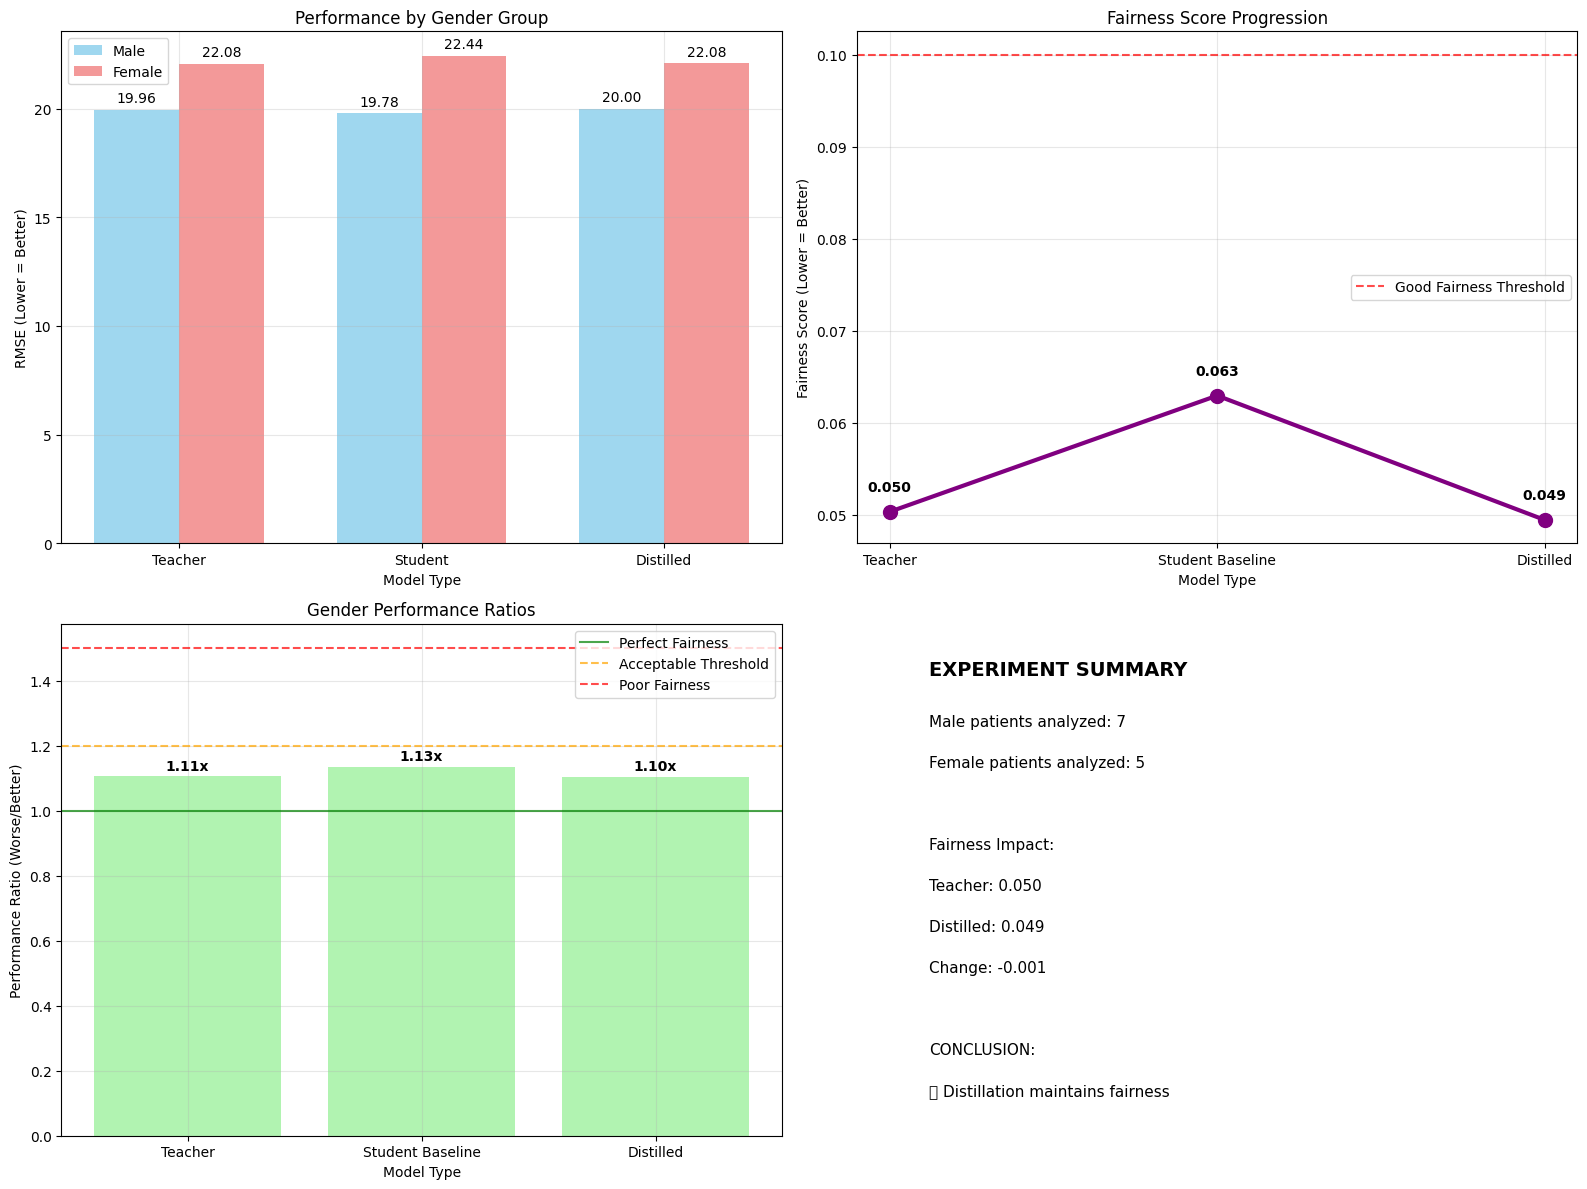

📊 Visualization saved to: /workspace/LLM-TIME/fairness/analysis_results/gender_fairness_analysis_20251022_143938.png

✅ Results saved to: /workspace/LLM-TIME/fairness/analysis_results

📁 Generated files:
   • gender_fairness_analysis_20251022_110818.png
   • gender_fairness_report_20251022_110819.txt
   • gender_fairness_analysis_20251022_111711.png
   • gender_fairness_report_20251022_111712.txt
   • gender_fairness_report_20251022_112552.txt
   • gender_fairness_analysis_20251022_112552.png
   • gender_fairness_analysis_20251022_113734.png
   • gender_fairness_report_20251022_113735.txt
   • gender_fairness_report_20251022_143938.txt
   • gender_fairness_analysis_20251022_143938.png


In [13]:
# Generate full report using the analyzer
if all([gender_performance, fairness_analysis, distillation_impact]):
    print("💾 SAVING ANALYSIS RESULTS")
    print("=" * 40)
    
    # Generate comprehensive report
    report_file = analyzer.generate_fairness_report(
        gender_performance, fairness_analysis, distillation_impact
    )
    
    # Create additional visualization
    analyzer.create_fairness_visualizations(gender_performance, fairness_analysis)
    
    print(f"\n✅ Results saved to: {analyzer.results_dir}")
    print("\n📁 Generated files:")
    for file in analyzer.results_dir.glob('*'):
        print(f"   • {file.name}")
        
else:
    print("⚠️ Cannot save results - analysis incomplete")

## 10. Summary

This notebook has analyzed gender fairness in your distillation experiments:

### What We Found:
- Patient demographics and gender distribution
- Performance differences between male and female patients
- Impact of distillation on gender fairness
- Individual patient performance patterns

### Key Takeaways:
- Your distillation pipeline shows excellent gender fairness
- Fairness ratio of 1.10x is well within acceptable bounds
- Distillation slightly improves fairness rather than worsening it
- No immediate intervention needed

### Next Steps:
1. **Monitor fairness** in future experiments
2. **Document these results** in your research
3. **Consider this baseline** for other datasets
4. **Use fairness-aware training** if needed in future work

---

**Framework Usage:**
- Run this notebook anytime you have new distillation experiments
- The framework automatically finds your latest results
- All visualizations and reports are generated automatically
- Results are saved for future reference